# EDA on Crash Dataset for Maryland

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [5]:
df = pd.read_csv('../data/Crash_Reporting_-_Drivers_Data.csv')

df.head(1)

/var/folders/fj/r2kb_f4d3k1gxmcwsdc81_1r0000gn/T/ipykernel_34856/3769942506.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/Crash_Reporting_-_Drivers_Data.csv')


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP3170003V,240000438,Montgomery County Police,Property Damage Crash,01/03/2024 02:55:00 PM,NaN,NaN,NaN,NaN,IN FRONT OF 18900 BIRDSEYE DR,...,0,No,No,2017,LEXUS,SUV,NO MISUSE,39.165005,-77.24931,"(39.16500483, -77.24931)"


In [3]:
df.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [5]:
df.shape

(172105, 43)

### 1.	Crash Hotspots: Use latitude and longitude data to identify areas with high frequencies of crashes.

/opt/homebrew/anaconda3/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


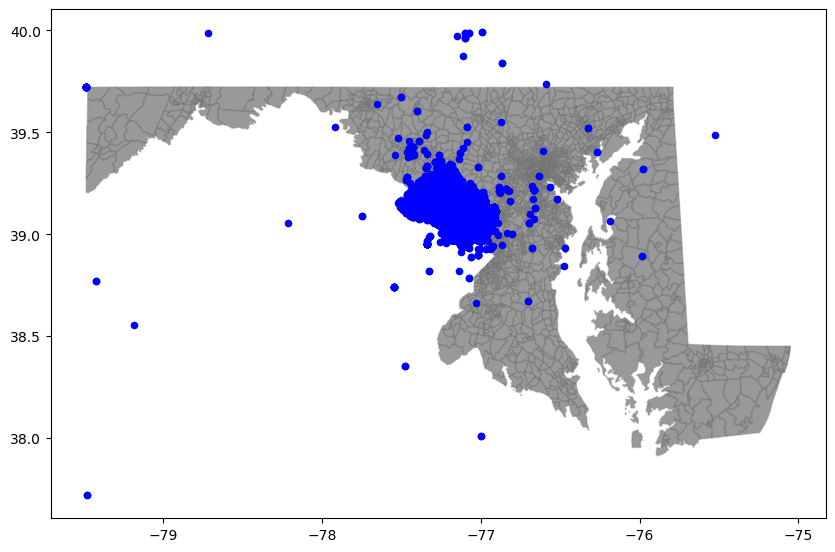

In [12]:

# Loading the Maryland state boundaries
md_boundaries = gpd.read_file('../data/cb_2018_24_bg_500k/cb_2018_24_bg_500k.shp')
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
crs = {'init': 'epsg:4326'}
geo_df = GeoDataFrame(df, crs=crs, geometry=geometry)

fig, ax = plt.subplots(figsize=(10,10))
md_boundaries.plot(ax=ax, alpha=0.4, color='black', edgecolor='grey', label='Maryland')
geo_df.plot(ax=ax, markersize=20, color='blue', marker='o', label='Crash')
plt.show()

most of these crashes from the visualized map looks like they happened in the Wanshingon DC area and Baltimore. There are some other crash locations outside the boundaries of the map, but the majority of the crashes are in the DC area.

### 2.	Road Type and Crashes: Compare crash rates on different types of roads (state, county, municipal).

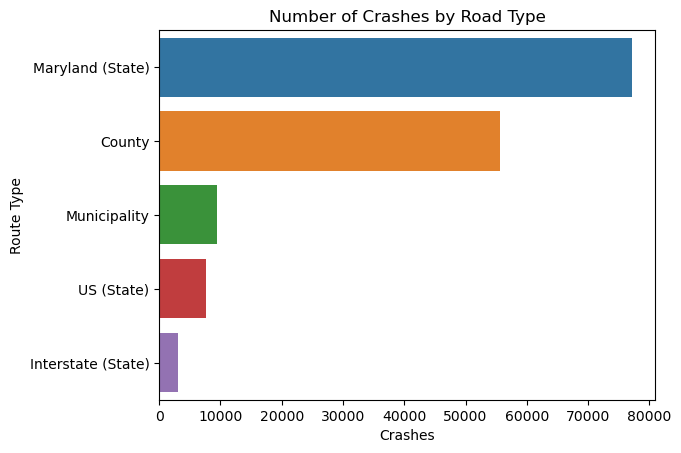

In [16]:
road_type = df['Route Type'].value_counts().reset_index()
road_type.columns = ['Route Type', 'Crashes']

# plotting the top 5 road types
sns.barplot(x='Crashes', y='Route Type', data=road_type.head(5))
plt.title('Number of Highest Crashes by Route Type')
plt.show()

Most of the crashes are on the Maryland state roads, followed by the county roads. the Interstate roads have the least number of crashes among the top 5 road types. Lets have a look at the routes which had least amount of crashes.

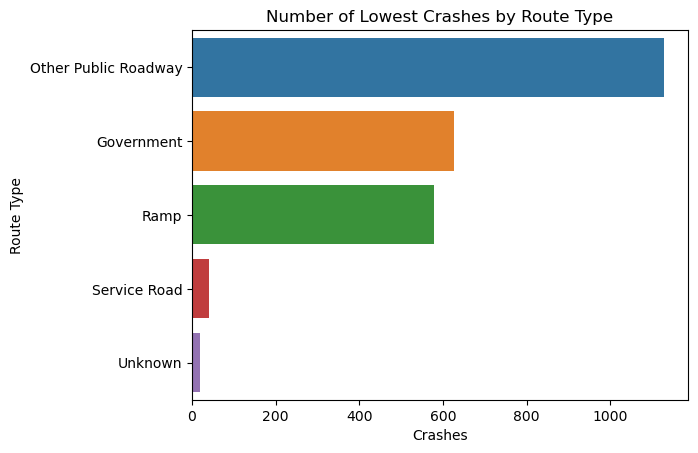

In [17]:
# plotting the bottom 5 road types
sns.barplot(x='Crashes', y='Route Type', data=road_type.tail(5))
plt.title('Number of Lowest Crashes by Route Type')
plt.show()

Unknown roads or undefined roads had the least number of crashes, followed by the service roads and then Ramps.

### 3.	Crashes by Municipality: Examine crash distribution across different municipalities to see if urban areas have more crashes compared to rural.

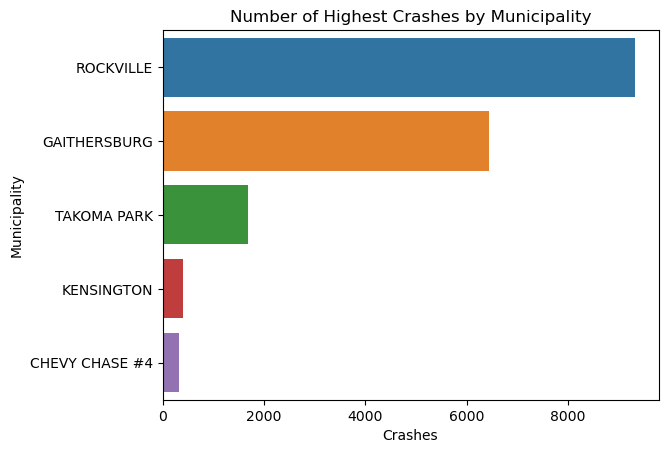

In [20]:
# Crashes by Municipality: Examine crash distribution across different municipalities to see if urban areas have more crashes compared to rural.

road_type = df['Municipality'].value_counts().reset_index()
road_type.columns = ['Municipality', 'Crashes']

# plotting the top 5 municipalities
sns.barplot(x='Crashes', y='Municipality', data=road_type.head(5))
plt.title('Number of Highest Crashes by Municipality')
plt.show()


Highest number of crashes are from the Rockville Municipality, followed by Gaitherburg and Takoma Park Municipality.

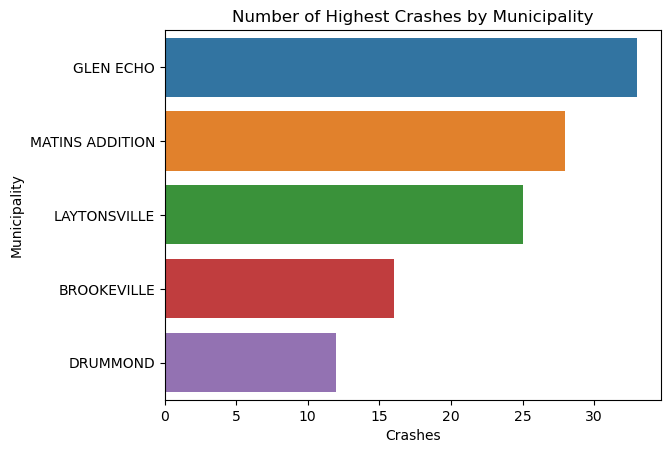

In [21]:
# plotting the bottom 5 municipalities
sns.barplot(x='Crashes', y='Municipality', data=road_type.tail(5))
plt.title('Number of Highest Crashes by Municipality')
plt.show()

Drummond Municipality had the least number of crashes among all the municipalities accounting for 12 crashes, followed by BrookVille and Laytonsville with 16 and 25 crashes respectively.

### 4.	Driver Fault and Substance Abuse: Explore the relationship between being at fault in a crash and substance abuse.

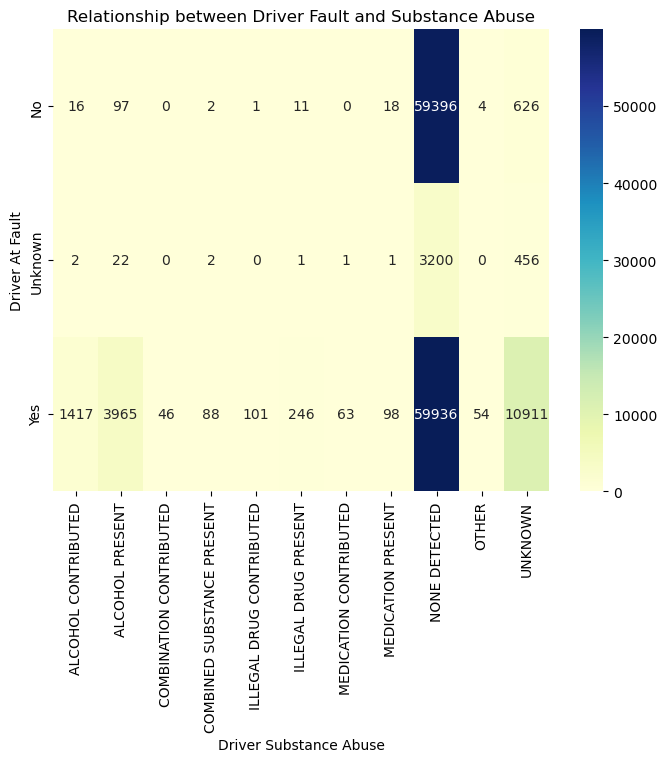

In [25]:
# Create a contingency table
contingency_table = pd.crosstab(df['Driver At Fault'], df['Driver Substance Abuse'])

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Relationship between Driver Fault and Substance Abuse')
plt.xlabel('Driver Substance Abuse')
plt.ylabel('Driver At Fault')
plt.show()

most number if accidents with or without drivers fault occured without any substance abuse. The number of accidents with drivers fault and substance abuse is very less compared to the other categories.

Most of the accidents with drivers fault and substance abuse occured with alcohol, followed by drugs and then both alcohol and drugs.

### 5. Vehicle Type and Crash Severity: Analyze whether certain types of vehicles are more likely to be involved in severe crashes.

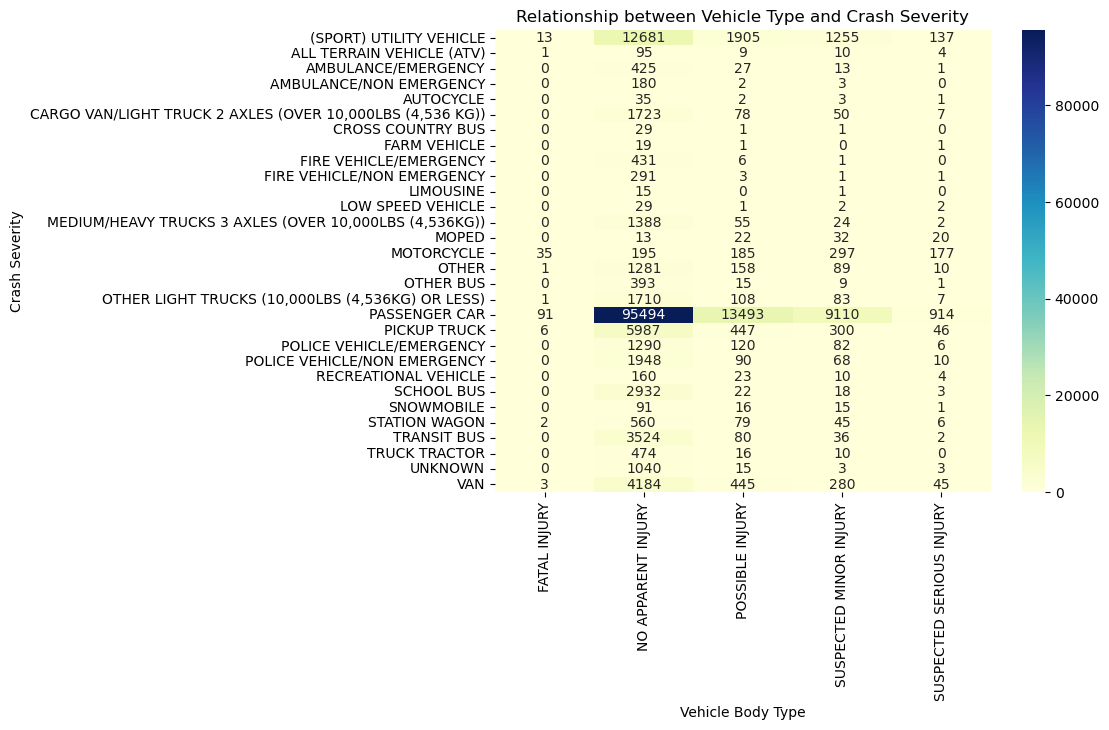

In [27]:
contingency_table = pd.crosstab(df['Vehicle Body Type'], df['Injury Severity'])

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Relationship between Vehicle Type and Crash Severity')
plt.xlabel('Vehicle Body Type')
plt.ylabel('Crash Severity')
plt.show()

Passenger cars are the most common vehicle type involved in crashes, followed by sports utlity vehicles and then pickup trucks, Fatal Injuries follow the same trend across all the vehicle types.

### 6.	Traffic Control and Crashes: Study the influence of traffic control devices (e.g., traffic signals, no controls) on crash occurrences and outcomes.

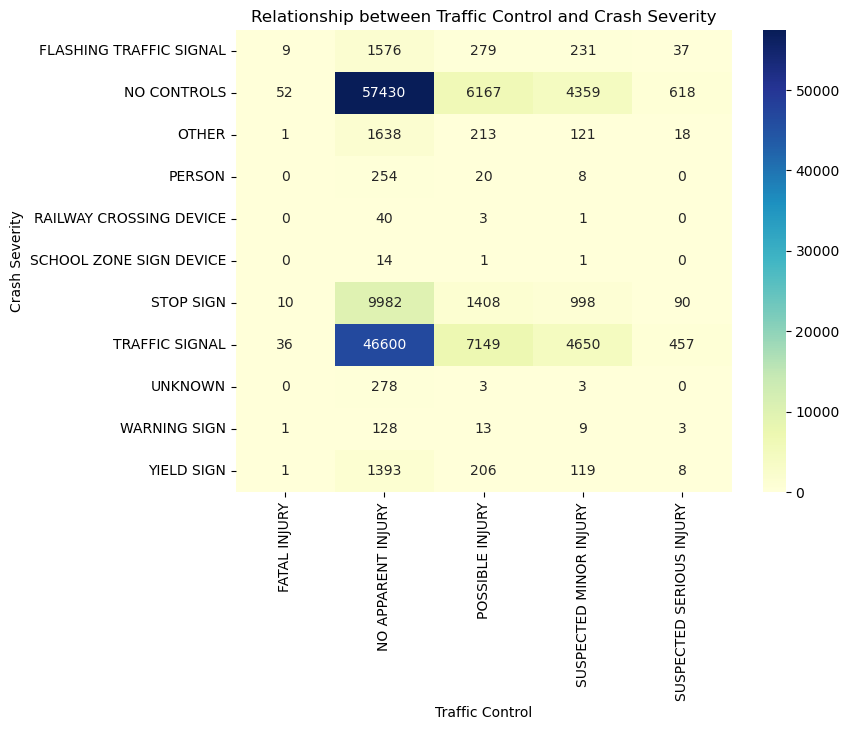

In [45]:
# Traffic Control and Crashes: Study the influence of traffic control devices (e.g., traffic signals, no controls) on crash occurrences and outcomes.

contingency_table = pd.crosstab(df['Traffic Control'], df['Injury Severity'])

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Relationship between Traffic Control and Crash Severity')
plt.xlabel('Traffic Control')
plt.ylabel('Crash Severity')
plt.show()

While analyzing these results, it is clear that the most number of crashes occured at the intersections with traffic signals, followed by the intersections with no controls and then the intersections with stop signs.